## Behaviorial Cloning Project


The goals / steps of this project are the following:
* Use the simulator to collect data of good driving behavior
* Build, a convolution neural network in Keras that predicts steering angles from images
* Train and validate the model with a training and validation set
* Test that the model successfully drives around track one without leaving the road
* Summarize the results with a written report


In [1]:
import csv
import cv2
import matplotlib.pyplot as plt
import re
import h5py
import numpy as np

In [2]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Cropping2D, Dropout, Activation
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

Using TensorFlow backend.


### Reading dataset
I use the dataset was given by Udacity in class. I collected dataset myself but after training some model, my dataset is not give a better result.

In [3]:
lines = []

with open("./data/data/driving_log.csv") as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)

In [4]:
np.shape(lines)

(8036, 7)

In [5]:
lines[3]

['IMG/center_2016_12_01_13_31_13_037.jpg',
 ';IMG/left_2016_12_01_13_31_13_037.jpg',
 ';IMG/right_2016_12_01_13_31_13_037.jpg',
 ';0',
 ';0',
 ';0',
 ';1.438419']

Show an example image:

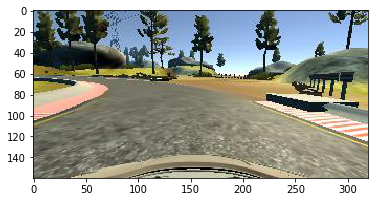

In [21]:
file = "./data/data/IMG/center_2016_12_01_13_31_13_381.jpg"

img_ = plt.imread(file)
plt.imshow(img_)
plt.show()

Using multiple cameras and reading steering measurements:

In [7]:
images = []
measurements = []

for line in lines:
    for i in range(3):
        source_path = line[i]
        filename = source_path.split('/')[-1]

        current_path = './data/data/IMG/' + filename
        image = cv2.imread(current_path)
        images.append(image)

        measurement = float(re.sub(";","",line[3]))
        measurements.append(measurement)    

In [8]:
np.shape(images)

(24108, 160, 320, 3)

Data augmentation:

In [10]:
augmented_images = []
augmented_measurements = []

for image, measurement in zip(images, measurements):
    augmented_images.append(image)
    augmented_measurements.append(measurement)
    
    augmented_images.append(cv2.flip(image,1))
    augmented_measurements.append(measurement*-1.0)

In [11]:
np.shape(augmented_images)

(48216, 160, 320, 3)

In [12]:
np.shape(augmented_measurements)

(48216,)

### Build NVIDIA Model using Keras

In [13]:
X_train = np.array(augmented_images)
y_train = np.array(augmented_measurements)

In [14]:
np.shape(X_train)

(48216, 160, 320, 3)

In [15]:
np.shape(y_train)

(48216,)

In [17]:
model = Sequential()

model.add(Lambda(lambda x: x/255.0 - 0.5, input_shape=(160,320,3)))
model.add(Cropping2D(cropping=((70,25),(0,0))))

model.add(Convolution2D(24,5,5, subsample=(2,2), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(36,5,5, subsample=(2,2), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(48,5,5, subsample=(2,2), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(64,3,3, activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(64,3,3, activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())

model.add(Dense(1164))
model.add(Dropout(0.5))
model.add(Dense(100))
model.add(Dropout(0.5))
model.add(Dense(50))
model.add(Dropout(0.5))
model.add(Dense(1))

model.compile(loss="mse", optimizer="adam")
model.fit(X_train, y_train, validation_split=0.25, shuffle=True, epochs=5)

model.save("model_4p_dropout.h5")

c:\program files\python35\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), activation="relu", strides=(2, 2))`
  
c:\program files\python35\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="relu", strides=(2, 2))`
  
c:\program files\python35\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="relu", strides=(2, 2))`
  # Remove the CWD from sys.path while we load stuff.
c:\program files\python35\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  if sys.path[0] == '':
c:\program files\python35\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  


Train on 36162 samples, validate on 12054 samples
Epoch 1/5
36162/36162 [==============================] - 702s 19ms/step - loss: 0.0156 - val_loss: 0.0144
Epoch 2/5
36162/36162 [==============================] - 696s 19ms/step - loss: 0.0120 - val_loss: 0.0138
Epoch 3/5
36162/36162 [==============================] - 730s 20ms/step - loss: 0.0118 - val_loss: 0.0124
Epoch 4/5
36162/36162 [==============================] - 735s 20ms/step - loss: 0.0116 - val_loss: 0.0133
Epoch 5/5
36162/36162 [==============================] - 740s 20ms/step - loss: 0.0117 - val_loss: 0.0123


In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_2 (Lambda)            (None, 160, 320, 3)       0         
_________________________________________________________________
cropping2d_2 (Cropping2D)    (None, 65, 320, 3)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 31, 158, 24)       1824      
_________________________________________________________________
dropout_9 (Dropout)          (None, 31, 158, 24)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 77, 36)        21636     
_________________________________________________________________
dropout_10 (Dropout)         (None, 14, 77, 36)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 5, 37, 48)         43248     
__________


## Improvement
* The model_4p_dropout.h5 was trainned 4 epochs with dropout .50. The autonomous car keep staying on the left side and goes out of the road. So when I add dropout and increase number of epoch to 7, this model still have overfitting.

* Then I decided to remove dropout and increase epoch to 10, that's my last model. Although it stays in the middle of road, but sometimes fail in the corner that it must turns right. Because the training data of turning right is too little. Maybe I should collect more data by training the car goes counter-clockwise?

Any help will be appreciated!

#### Below is the Training result of 10 epochs model without dropout

<br>Train on 38572 samples, validate on 9644 samples
<br>Epoch 1/10
<br>38572/38572 [==============================] - 643s 17ms/step - loss: 0.0119 - val_loss: 0.0109
<br>Epoch 2/10
<br>38572/38572 [==============================] - 599s 16ms/step - loss: 0.0099 - val_loss: 0.0110
<br>Epoch 3/10
<br>38572/38572 [==============================] - 598s 16ms/step - loss: 0.0097 - val_loss: 0.0105
<br>Epoch 4/10
<br>38572/38572 [==============================] - 599s 16ms/step - loss: 0.0096 - val_loss: 0.0108
<br>Epoch 5/10
<br>38572/38572 [==============================] - 599s 16ms/step - loss: 0.0095 - val_loss: 0.0104
<br>Epoch 6/10
<br>38572/38572 [==============================] - 597s 15ms/step - loss: 0.0094 - val_loss: 0.0117
<br>Epoch 7/10
<br>38572/38572 [==============================] - 598s 16ms/step - loss: 0.0093 - val_loss: 0.0106
<br>Epoch 8/10
<br>38572/38572 [==============================] - 599s 16ms/step - loss: 0.0091 - val_loss: 0.0107
<br>Epoch 9/10
<br>38572/38572 [==============================] - 603s 16ms/step - loss: 0.0091 - val_loss: 0.0105
<br>Epoch 10/10
<br>38572/38572 [==============================] - 630s 16ms/step - loss: 0.0087 - val_loss: 0.0110

<br>
<br>
Layer (type)                 Output Shape              Param #   
_________________________________________________________________
lambda_1 (Lambda)            (None, 160, 320, 3)       0         
_________________________________________________________________
cropping2d_1 (Cropping2D)    (None, 65, 320, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 31, 158, 24)       1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 77, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 37, 48)         43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 35, 64)         27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 33, 64)         36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 2112)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1164)              2459532   
_________________________________________________________________
dense_2 (Dense)              (None, 100)               116500    
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
_________________________________________________________________
Total params: 2,712,481
Trainable params: 2,712,481
Non-trainable params: 0
_________________________________________________________________

### Video result

In [26]:
import imageio

# Run this download command if necessary
#imageio.plugins.ffmpeg.download()

# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [27]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format("run1.mp4"))